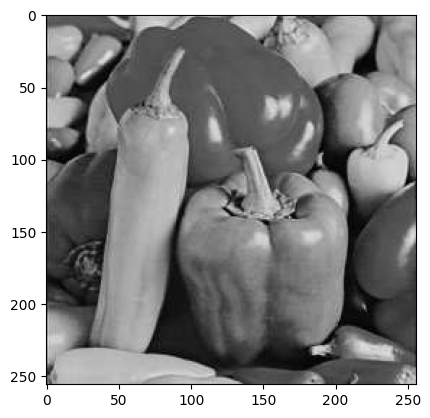

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read and display the image
file = 'peppers.png'
image = cv.imread(file, cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
print(image.shape[0],image.shape[1])
print("8'b{:08b};\n".format(image[0, 0]))
print("8'b{:08b};\n".format(image[255, 255]))

256 256
8'b00110000;

8'b10111000;



In [ ]:
# write the binary representation of the image pixels to a txt file to replace data in Ram.v
ram_index = 0# we will be storing the image starting from the address 20 in our Data RAM
with open(file.split('.')[0] + '.txt', 'w') as imgfile:
    for row in range(image.shape[0]+2):
        for col in range(image.shape[1]+2):
            # print(image[row, col])
            if row == 0:
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, 0))
              ram_index += 1
            elif row == 257:
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, 0))
              ram_index += 1
            elif col == 0:
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, 0))
              ram_index += 1
            elif col == 257:
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, 0))
              ram_index += 1
            else :
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, image[row-1, col-1]))
              ram_index += 1


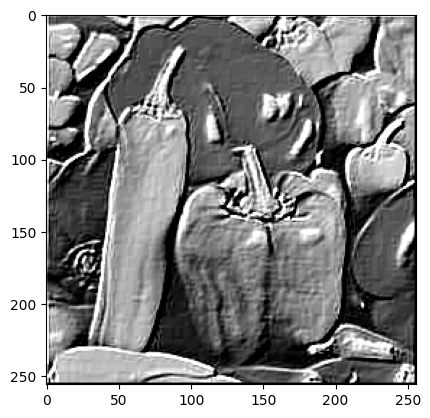

In [ ]:
# read the text file output from the vivado and reconstruct the image
import numpy as np
import matplotlib.pyplot as plt

dsimagesize = 256 # size of the downsampled image
dsimage_vivado = np.zeros((dsimagesize, dsimagesize))
with open('output.txt', 'r') as imgfile:
    lines = imgfile.readlines()
    line = 0
    for row in range(dsimagesize):
        for col in range(dsimagesize):
            pixel_val =  int(lines[line].split('\n')[0][-8:], 2)
            # print(pixel_val)
            dsimage_vivado[row,col] = pixel_val
            line += 1

# visualise the image
fig, ax = plt.subplots()
ax.imshow(dsimage_vivado, cmap='gray', vmin = 0, vmax = 255)
plt.savefig("vivado.png")
plt.show()

In [ ]:
# write the binary representation of the image pixels to a txt file to replace data in Ram.v
ram_index = 0# we will be storing the image starting from the address 20 in our Data RAM
with open(file.split('.')[0] + '.txt', 'w') as imgfile:
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            # print(image[row, col])
              imgfile.write("mem[{}] = 8'b{:08b};\n".format(ram_index, image[row, col]))
              ram_index += 1

In [ ]:
# write the binary representation of the image pixels to a txt file to replace data in Ram.v
ram_index = 0# we will be storing the image starting from the address 20 in our Data RAM
with open(file.split('.')[0] + '.mem', 'w') as imgfile:
    for row in range(image.shape[0]+2):
        for col in range(image.shape[1]+2):
            # print(image[row, col])
            if row == 0:
              imgfile.write("{:08b}\n".format(0))
              ram_index += 1
            elif row == 257:
              imgfile.write("{:08b}\n".format(0))
              ram_index += 1
            elif col == 0:
              imgfile.write("{:08b}\n".format(0))
              ram_index += 1
            elif col == 257:
              imgfile.write("{:08b}\n".format(0))
              ram_index += 1
            else :
              imgfile.write("{:08b}\n".format(image[row-1, col-1]))
              ram_index += 1


In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im_in = cv.imread('/content/myimage.jpg');
%im_in = imrotate(im_in, 90);
im = cv.imresize(im_in, [256 256]);
im(:,:,1) = double(im(:,:,1))*7/255;
im(:,:,2) = double(im(:,:,2))*7/255;
im(:,:,3) = double(im(:,:,3))*3/255;
im2 = im(:,:,1)+im(:,:,2)*8+im(:,:,3)*64;
temph = fopen('temph.txt','w');

fprintf(temph,'%.2x\n', uint8(im2));
fclose(temph);

SyntaxError: ignored